In [5]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

plt.rc('font', family='sans-serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
savepath = "/Users/saadjansari/Desktop/Meetings/Flatiron/Flatiron 201015"
plt.close('all')
dt = 0.01

In [6]:
fpath = '/Users/saadjansari/Documents/Projects/Results/AMSOS/Tactoids/scan_filamin_6400/run'
simnames = [
    "f1",
#     "f1_5",
    "f2",
    "f2_5_merged",
    "f5_merged",
    "f10_merged",
]
files = [ os.path.join( fpath,ii) for ii in simnames]

fnames = [
    'f-1.0',
#     'f-1.5',
    'f-2.0',
    'f-2.5',
    'f-5.0',
    'f-10.0',
]
fvals = [1.0, 2.0, 2.5, 5.0, 10.0]

S_bulk = np.zeros( (2, len(fvals)))
S_cluster = np.zeros( (2, len(fvals)))
actin_in = np.zeros( (2, len(fvals)))
aspect_ratio = np.zeros( (2, len(fvals)))

# filamin_in = np.zeros( (2, len(fvals)))
# filamin_to_actin = np.zeros( (2, len(fvals)))
for idx in range(len(fvals)):
    
    dat = pd.read_feather( os.path.join(files[idx], 'df.ftr') )    
    st_pt = len(dat.index) - int(np.ceil(0.1/dt))
    
    # Nematic order
    S_bulk[:,idx]= [ np.mean( dat['S_bulk'][st_pt::]), 
                    np.std( dat['S_bulk'][st_pt::]) ]
    S_cluster[:,idx]= [ np.mean( dat['S_cluster'][st_pt::]), 
                       np.std( dat['S_cluster'][st_pt::]) ]
    # actin filamints inside
    actin_in[:,idx]= [ np.mean( dat['num_cluster'][st_pt::]/6400), 
                      np.std( dat['num_cluster'][st_pt::])/6400 ]
    aspect_ratio[:,idx]= [ np.mean( dat['tactoid_aspect_ratio'][st_pt::]), 
                          np.std( dat['tactoid_aspect_ratio'][st_pt::]) ]

    # filamin inside
    # fila_ratio = dat['xlink_num'][st_pt::]/dat['params']['nP']
    #filamin_in[:,idx]= [ np.mean( fila_ratio), np.std( fila_ratio) ]
    # filamin to actin
    #filamin_to_actin[:,idx]= [ np.mean( dat['xlink_ratio'][st_pt::]), np.std( dat['xlink_ratio'][st_pt::]) ]

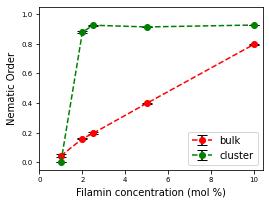

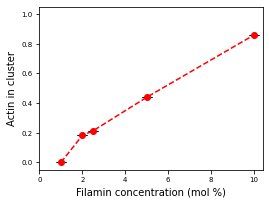

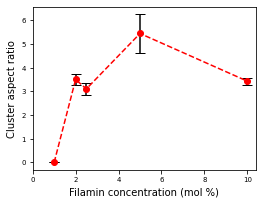

In [7]:
# Nematic order
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(fvals, S_bulk[0,:], yerr=S_bulk[1,:], color='red', ls='--', 
            marker='o', capsize=5, capthick=1, ecolor='black', label='bulk')

ax.errorbar(fvals, S_cluster[0,:], yerr=S_cluster[1,:], color='green', ls='--', 
            marker='o', capsize=5, capthick=1, ecolor='black', label='cluster')
ax.set_xlabel('Filamin concentration (mol %)')
ax.set_ylabel('Nematic Order')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[0,10.4])
plt.savefig( os.path.join(savepath, "Tac_S_vs_filamin.pdf"))


# Size of clusters
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(fvals, actin_in[0,:], yerr=actin_in[1,:], color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
ax.set_xlabel('Filamin concentration (mol %)')
ax.set_ylabel('Actin in cluster')
ax.set(ylim=[-0.05,1.05], xlim=[0,10.4])
plt.savefig( os.path.join(savepath, "Tac_actin_num_vs_filamin.pdf"))


# Aspect ratio
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(fvals, aspect_ratio[0,:], yerr=aspect_ratio[1,:], color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
ax.set_xlabel('Filamin concentration (mol %)')
ax.set_ylabel('Cluster aspect ratio')
ax.set(xlim=[0,10.4])
plt.savefig( os.path.join(savepath, "Tac_aspectratio_vs_filamin.pdf"))

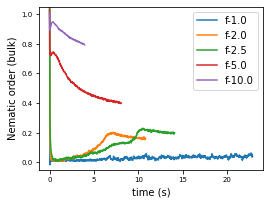

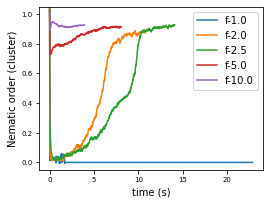

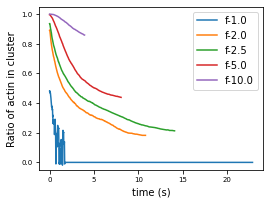

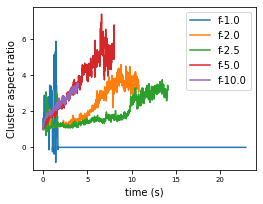

In [8]:
# Bulk nematic order over time
fig, ax = plt.subplots(1,1, figsize=(4,3))
for idx in range(len(fvals)):
    
    dat = pd.read_feather( os.path.join(files[idx], 'df.ftr') )    
    trange = dt*np.arange( 0, len(dat.index) )
    data = savgol_filter( np.array(dat['S_bulk']), 7, 3)
    
    ax.plot(trange, data , ls='-', label=fnames[idx])
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Nematic order (bulk)')
ax.set(ylim=[-0.05,1.05])
plt.legend()
plt.savefig( os.path.join(savepath, "Tac_S_bulk_dt.pdf"))

# Cluster nematic order over time
fig, ax = plt.subplots(1,1, figsize=(4,3))
for idx in range(len(fvals)):
    
    dat = pd.read_feather( os.path.join(files[idx], 'df.ftr') )    
    trange = dt*np.arange( 0, len(dat.index) )
    data = savgol_filter( np.array(dat['S_cluster']), 7, 3)
    
    ax.plot(trange, data , ls='-', label=fnames[idx])
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Nematic order (cluster)')
ax.set(ylim=[-0.05,1.05])
plt.legend()
plt.savefig( os.path.join(savepath, "Tac_S_cluster_dt.pdf"))



# Actin number over time
fig, ax = plt.subplots(1,1, figsize=(4,3))
for idx in range(len(fvals)):
    
    dat = pd.read_feather( os.path.join(files[idx], 'df.ftr') )    
    trange = dt*np.arange( 0, len(dat.index) )
    data = savgol_filter( np.array(dat['num_cluster']), 5, 3)/6400
    
    ax.plot(trange, data , ls='-', label=fnames[idx])
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Ratio of actin in cluster')
ax.set(ylim=[-0.05,1.05])
plt.legend()
plt.savefig( os.path.join(savepath, "Tac_actin_cluster_dt.pdf"))



# aspect ratio over time
fig, ax = plt.subplots(1,1, figsize=(4,3))
for idx in range(len(fvals)):
    
    dat = pd.read_feather( os.path.join(files[idx], 'df.ftr') )    
    trange = dt*np.arange( 0, len(dat.index) )
    data = savgol_filter( np.array(dat['tactoid_aspect_ratio']), 5, 3)
    
    ax.plot(trange, data , ls='-', label=fnames[idx])
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Cluster aspect ratio')
plt.legend()
plt.savefig( os.path.join(savepath, "Tac_actin_cluster_aspect_ratio.pdf"))